In [1]:
from solvers import OptimizationProblem, solve_lp_function, LinearSolver, IntegerSolver, Solver, OPTIMIZATION_PROBLEMS

## Definition through `OptimizationProblem`

In [2]:
OPTIMIZATION_PROBLEMS

[{'name': 'Problem 0',
  'url': 'https://www.youtube.com/watch?v=upcsrgqdeNQ',
  'object': OptimizationProblem(objective_coeffs=[5, 6],
  constraint_matrix=[[1, 1], [4, 7]],
  constraint_bounds=[5, 28],
  variable_bounds=[(0, None), (0, None)],
  objective_direction=max,
  variable_types=['continuous', 'continuous']),
  'z': 27.0,
  'solution': [3.0, 2.0]},
 {'name': 'Problem 1',
  'url': 'https://www.youtube.com/watch?v=BzKUhT20wDc',
  'object': OptimizationProblem(objective_coeffs=[5, 4],
  constraint_matrix=[[1, 1], [10, 6]],
  constraint_bounds=[5, 45],
  variable_bounds=[(0, None), (0, None)],
  objective_direction=max,
  variable_types=['continuous', 'continuous']),
  'z': 23.0,
  'solution': [3.0, 2.0]},
 {'name': 'Problem 2',
  'url': 'https://www.youtube.com/watch?v=BzKUhT20wDc',
  'object': OptimizationProblem(objective_coeffs=[5, 4],
  constraint_matrix=[[-3, -2], [-2, -3]],
  constraint_bounds=[-5, -7],
  variable_bounds=[(0, None), (0, None)],
  objective_direction=min,
  

In [3]:
problem_info = OPTIMIZATION_PROBLEMS[-1]
problem = problem_info['object']
problem

OptimizationProblem(objective_coeffs=[5, 4],
constraint_matrix=[[2, 3], [2, 1]],
constraint_bounds=[12, 6],
variable_bounds=[(0, None), (0, None)],
objective_direction=max,
variable_types=['continuous', 'continuous'])

## Use the `solve_lp_function` function

In [4]:
oc = problem.objective_coeffs
cm = problem.constraint_matrix
cb = problem.constraint_bounds
vb = problem.variable_bounds
od = problem.objective_direction
vt = problem.variable_types

In [5]:
obj, dvs = solve_lp_function(
    objective_coeffs = oc,
    constraint_matrix = cm,
    constraint_bounds = cb,
    variable_bounds = vb,
    objective_direction = od,
    verbose=True
    )

print(f"Objective value: {obj}")
print(f"Decision variables: {dvs}")

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -19.5
              x: [ 1.500e+00  3.000e+00]
            nit: 2
          lower:  residual: [ 1.500e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-7.500e-01 -1.750e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

Objective value: 19.5
Decision variables: [1.5 3. ]


## Use the `LinearSolver` class

In [6]:
linear_solver = LinearSolver()

In [7]:
linear_solver.solve(problem)

(19.5, array([1.5, 3. ]))

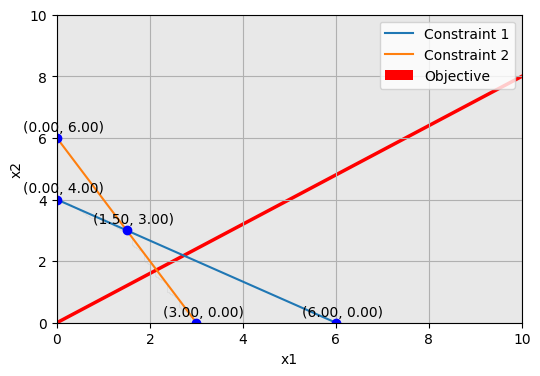

In [8]:
linear_solver.plot(problem, figsize=(6,4), scale = 0.2)

## Use the `IntegerSolver` class

In [9]:
integer_solver = IntegerSolver()

In [10]:
integer_solver.solve(problem)

pyvis_networkx.html


(18.0, array([2., 2.]))